In [59]:
%matplotlib inline
from skimage import io
from skimage.color import rgb2gray
from matplotlib import pyplot as plt
from glob import glob
from skimage.filters import sobel
import numpy as np
from itertools import product
import skimage.morphology as mp

In [41]:
def collage(data, n=7, m=3, width=12, imparams={}):
    sh = data[0].shape
    ratio = sh[0]/sh[1] * n/m
    fig, axes = plt.subplots(n, m,
                             gridspec_kw={"wspace": 0, "hspace": 0})
    fig.set_size_inches(width, width*ratio)
    axes = axes.flatten()
    for i, img in enumerate(data):
        axes[i].axis("off")
        axes[i].imshow(img, aspect='auto', **imparams)
    plt.show()

In [18]:
planes_orig = [io.imread(fn) for fn in sorted(glob("data/samolot??.jpg"))]
planes_bw = [rgb2gray(p) for p in planes_orig]

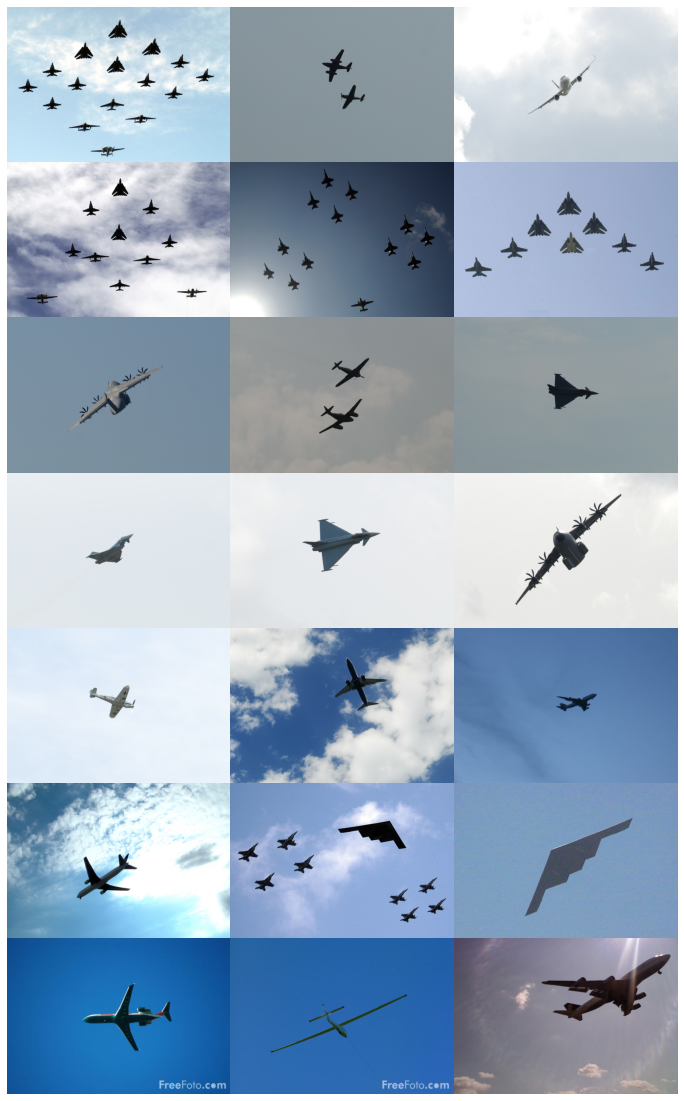

In [15]:
collage(planes_orig)

In [19]:
planes = planes_bw.copy()
for i in range(len(planes)):
    p = planes[i]
    planes[i] = sobel(p)

In [22]:
print(planes[0].dtype)

float64


In [90]:
planes2 = [np.uint8(255*p) for p in planes]
for i in range(len(planes2)):
    p = planes2[i]
    mn = np.mean(p)
    p = (p > 40)*255
    p = mp.erosion(p)
    p = mp.dilation(p)
    

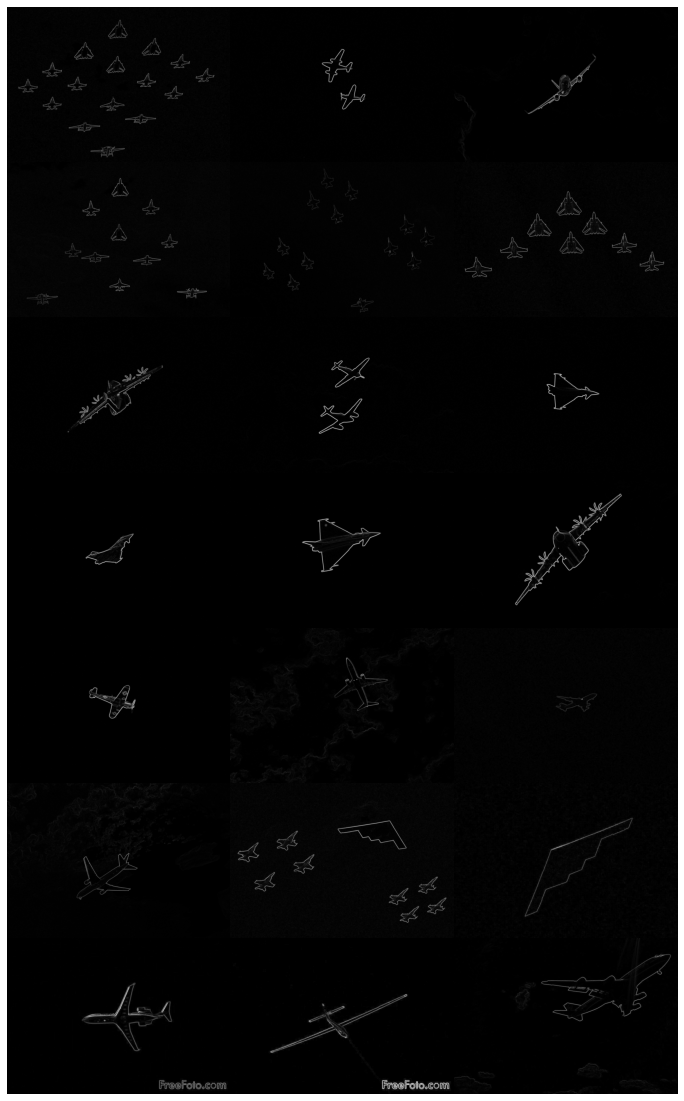

In [98]:
collage(planes2, imparams={"cmap": "gray"})